#Timeseries_NIFTY_50_predict_forecasting



##Types of forecasting problems
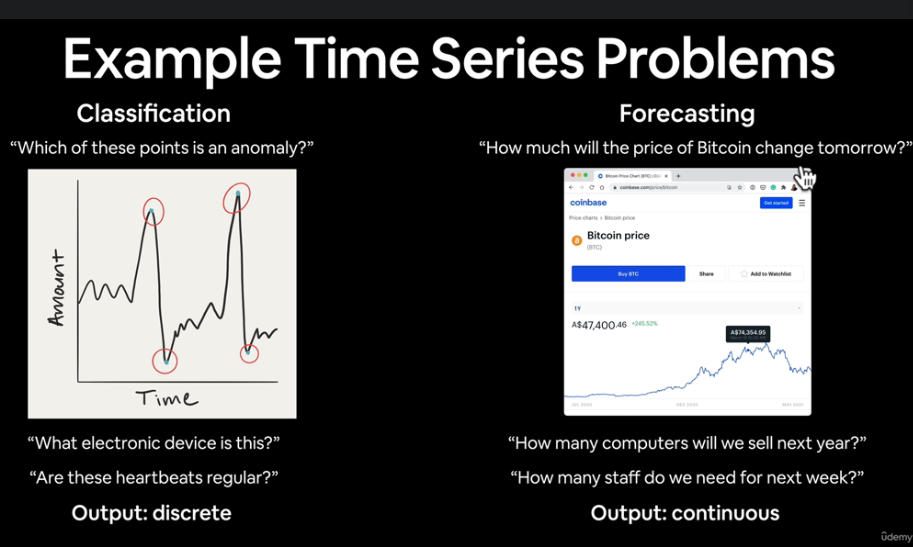

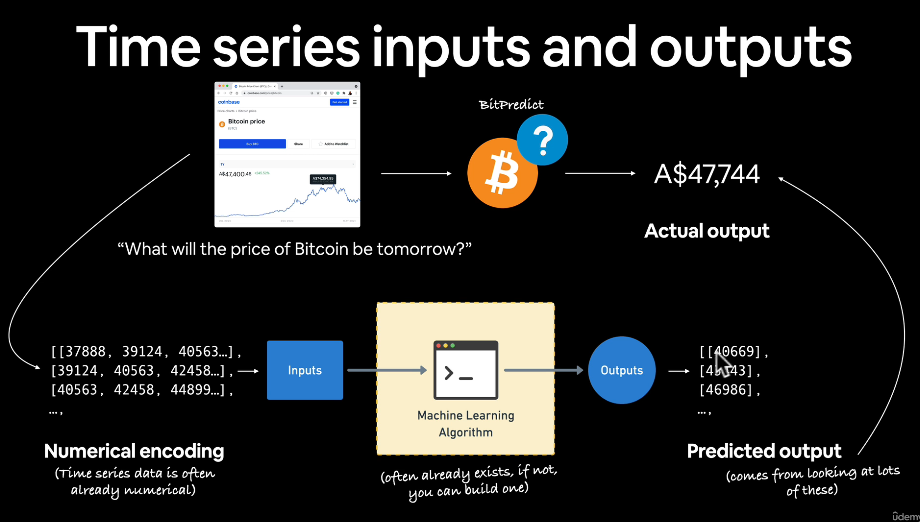

##Fetching the data

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NIFTY_data/NIFTY 50_Data (1).csv",
                 parse_dates=["Date"],
                 index_col=["Date"])

In [ ]:
df.head()

,Open,High,Low,Close
Date,,,,
2023-07-10,19400.35,19435.85,19327.1,19355.9
2023-07-07,19422.80,19523.60,19303.6,19331.8
2023-07-06,19385.70,19512.20,19373.0,19497.3
2023-07-05,19405.95,19421.60,19339.6,19398.5
2023-07-04,19406.60,19434.15,19300.0,19389.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6773 entries, 2023-07-10 to 1996-04-22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6772 non-null   float64
 1   High    6772 non-null   float64
 2   Low     6772 non-null   float64
 3   Close   6773 non-null   float64
dtypes: float64(4)
memory usage: 264.6 KB


In [ ]:
len(df)

6773

In [ ]:
df.tail()

,Open,High,Low,Close
Date,,,,
1996-04-26,1133.17,1133.17,1106.29,1123.6
1996-04-25,1157.94,1160.16,1110.61,1120.8
1996-04-24,1136.97,1145.11,1126.77,1145.1
1996-04-23,1090.04,1100.51,1090.04,1095.8
1996-04-22,1136.28,1136.28,1102.83,1106.9


##Types of timeseries forecasting

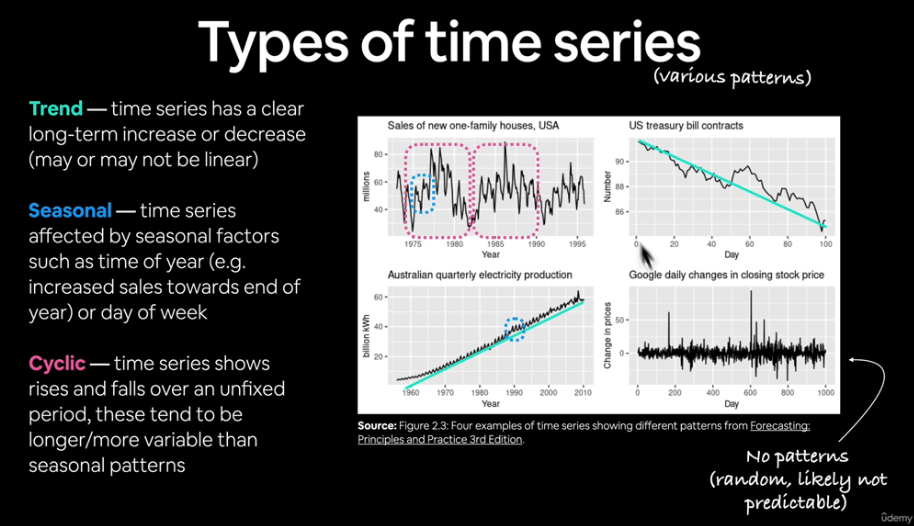

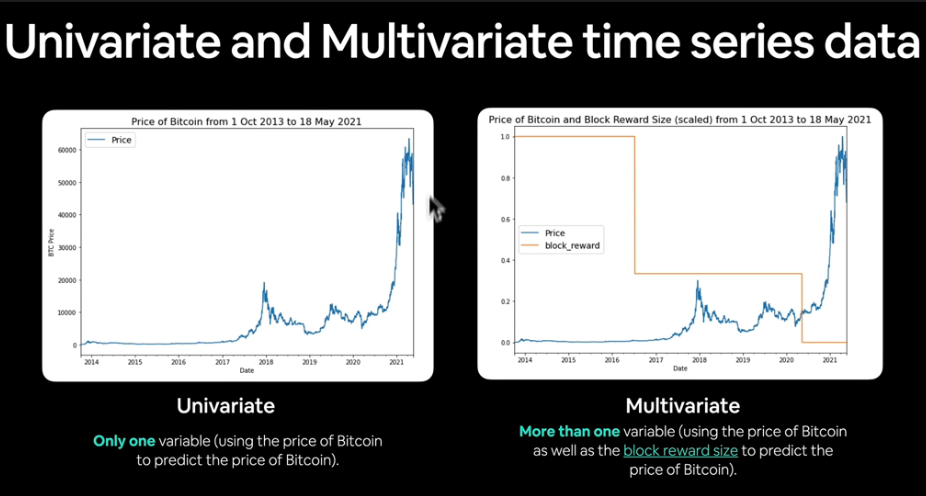

##Univariate prediction only using the closing prices to predict the future closing prices

In [ ]:
# Only want closing price for each day
nifty_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
nifty_prices.head()
# Reverse the DataFrame
nifty_prices = nifty_prices[::-1]

In [ ]:
nifty_prices.head()

,Price
Date,
1996-04-22,1106.9
1996-04-23,1095.8
1996-04-24,1145.1
1996-04-25,1120.8
1996-04-26,1123.6


Text(0.5, 1.0, 'historical NIFTY prices')

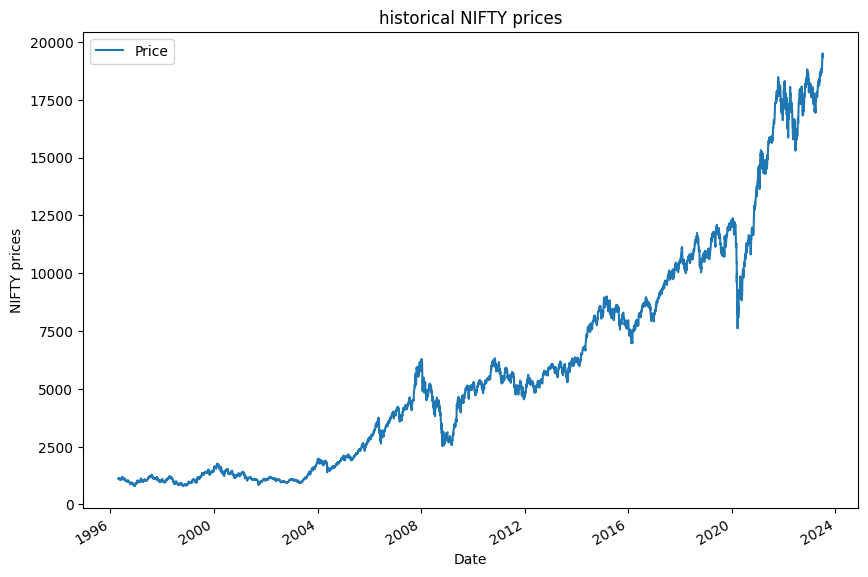

In [ ]:
import matplotlib.pyplot as plt
nifty_prices.plot(figsize = (10, 7))
plt.ylabel("NIFTY prices")
plt.title("historical NIFTY prices")

In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
nifty_price = []
with open("/content/drive/MyDrive/Colab Notebooks/NIFTY_data/NIFTY 50_Data (1).csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%d %b %Y")) # get the dates as dates (not strings), strptime = string parse time
    nifty_price.append(float(line[4])) # get the closing price as float

# View first 10 of each
timesteps[:10], nifty_price[:10]

([datetime.datetime(2023, 7, 10, 0, 0),
  datetime.datetime(2023, 7, 7, 0, 0),
  datetime.datetime(2023, 7, 6, 0, 0),
  datetime.datetime(2023, 7, 5, 0, 0),
  datetime.datetime(2023, 7, 4, 0, 0),
  datetime.datetime(2023, 7, 3, 0, 0),
  datetime.datetime(2023, 6, 30, 0, 0),
  datetime.datetime(2023, 6, 28, 0, 0),
  datetime.datetime(2023, 6, 27, 0, 0),
  datetime.datetime(2023, 6, 26, 0, 0)],
 [19355.9,
  19331.8,
  19497.3,
  19398.5,
  19389.0,
  19322.55,
  19189.05,
  18972.1,
  18817.4,
  18691.2])

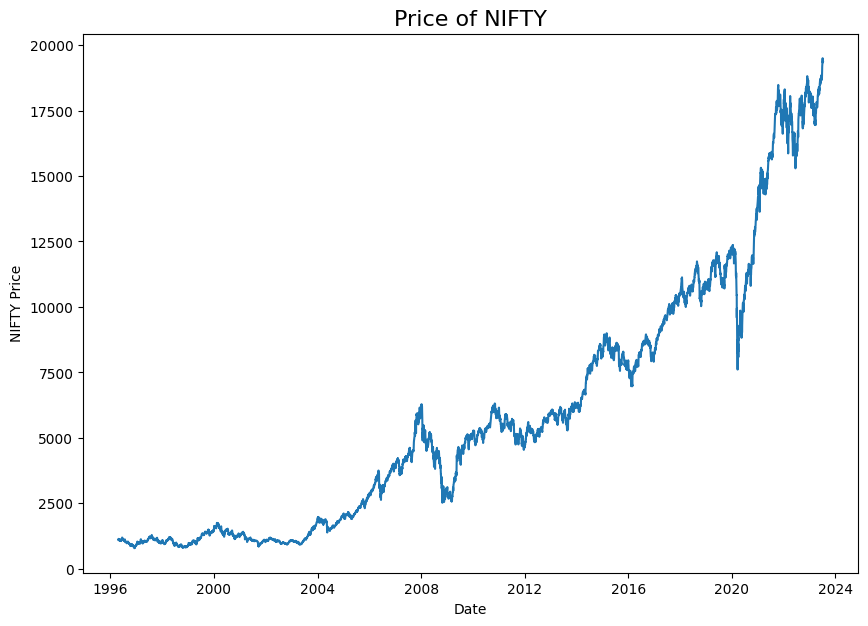

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, nifty_price)
plt.title("Price of NIFTY", fontsize=16)
plt.xlabel("Date")
plt.ylabel("NIFTY Price");

##Creating train and test spli

As the data contains a time component we will not randomly split the data into train and test

In [ ]:
# Get nifty date array
timesteps = nifty_prices.index.to_numpy()
prices = nifty_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['1996-04-22T00:00:00.000000000', '1996-04-23T00:00:00.000000000',
        '1996-04-24T00:00:00.000000000', '1996-04-25T00:00:00.000000000',
        '1996-04-26T00:00:00.000000000', '1996-04-29T00:00:00.000000000',
        '1996-04-30T00:00:00.000000000', '1996-05-01T00:00:00.000000000',
        '1996-05-02T00:00:00.000000000', '1996-05-03T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([1106.9, 1095.8, 1145.1, 1120.8, 1123.6, 1118.3, 1114.3, 1137.8,
        1132. , 1119.4]))

In [ ]:
split_size = int(0.8 * len(prices)) #Creating 80 - 20 split of data
#Creating the training set
X_train,y_train = timesteps[:split_size], prices[:split_size]

#Creating the testing set
X_test,y_test = timesteps[split_size:], prices[split_size:]

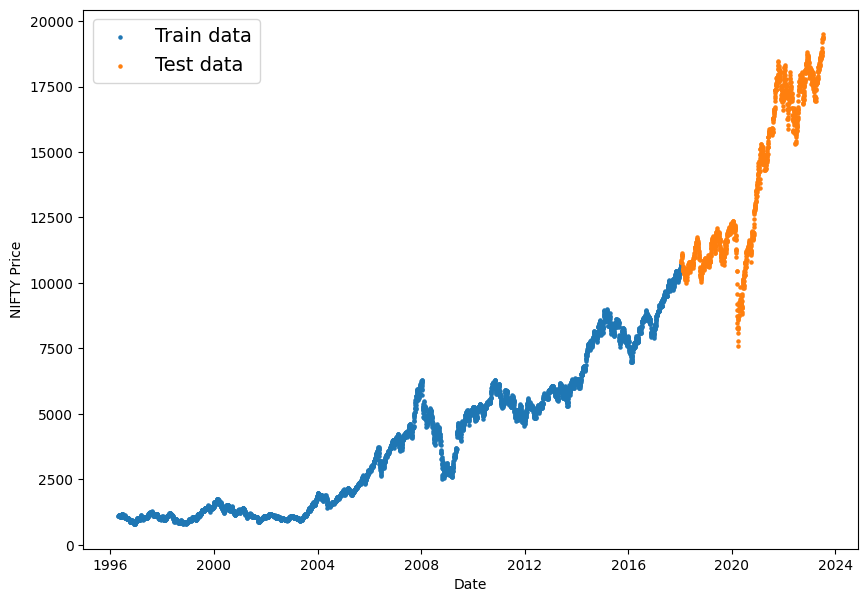

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("NIFTY Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

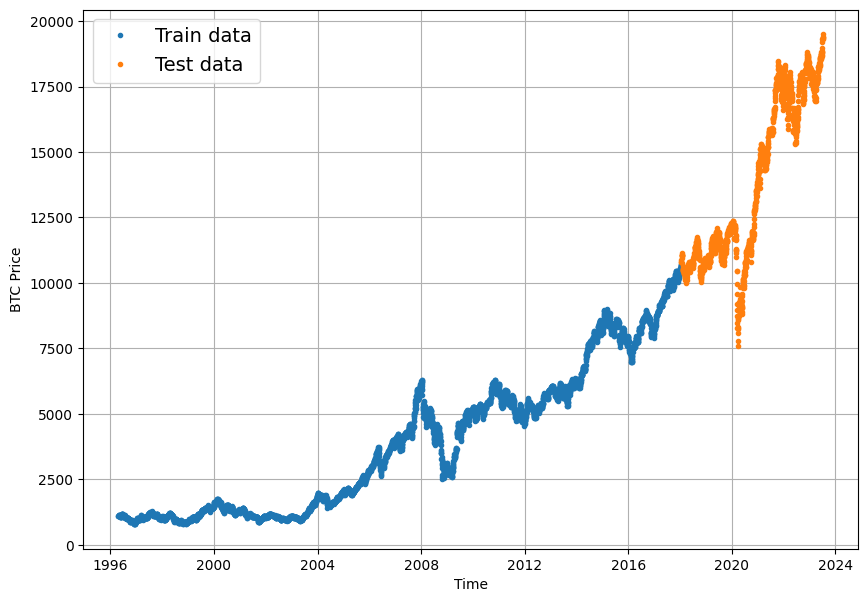

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

##Modelling Experiments
## Modelling Experiments

We can build almost any kind of model for our problem as long as the data inputs and outputs are formatted correctly.

However, just because we *can* build *almost any* kind of model, doesn't mean it'll perform well/should be used in a production setting.

We'll see what this means as we build and evaluate models throughout.

Before we discuss what modelling experiments we're going to run, there are two terms you should be familiar with, **horizon** and **window**.
  * **horizon** = number of timesteps to predict into future
  * **window** = number of timesteps from past used to predict **horizon**

For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

Now, how about those modelling experiments?

| Model Number | Model Type | Horizon size | Window size | Extra data |
| ----- | ----- | ----- | ----- | ----- |
| 0 | Naïve model (baseline) | NA | NA | NA |
| 1 | Dense model | 1 | 7 | NA |
| 2 | Same as 1 | 1 | 30 | NA |
| 3 | Same as 1 | 7 | 30 | NA |
| 4 | Conv1D | 1 | 7 | NA |
| 5 | LSTM | 1 | 7 | NA |
| 6 | Same as 1 (but with multivariate data) | 1 | 7 | Block reward size |
| 7 | [N-BEATs Algorithm](https://arxiv.org/pdf/1905.10437.pdf) | 1 | 7 | NA |
| 8 | Ensemble (multiple models optimized on different loss functions) | 1 | 7 | NA |
| 9 | Future prediction model (model to predict future values) | 1 | 7 | NA|
| 10 | Same as 1 (but with turkey 🦃 data introduced) | 1 | 7 | NA |

##Model 0 : Naive forecast

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep `t` (y-hat) is equal to the value at timestep `t-1` (the previous timestep)

In [ ]:
#Creating the naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[:-10:]

(array([10788.55, 10817.  , 10894.7 , 10966.2 , 11083.7 , 11086.  ,
        11069.65, 11130.4 , 11049.65, 11027.7 ]),
 array([10788.55, 10817.  , 10894.7 , ..., 18816.7 , 18856.85, 18771.25]))

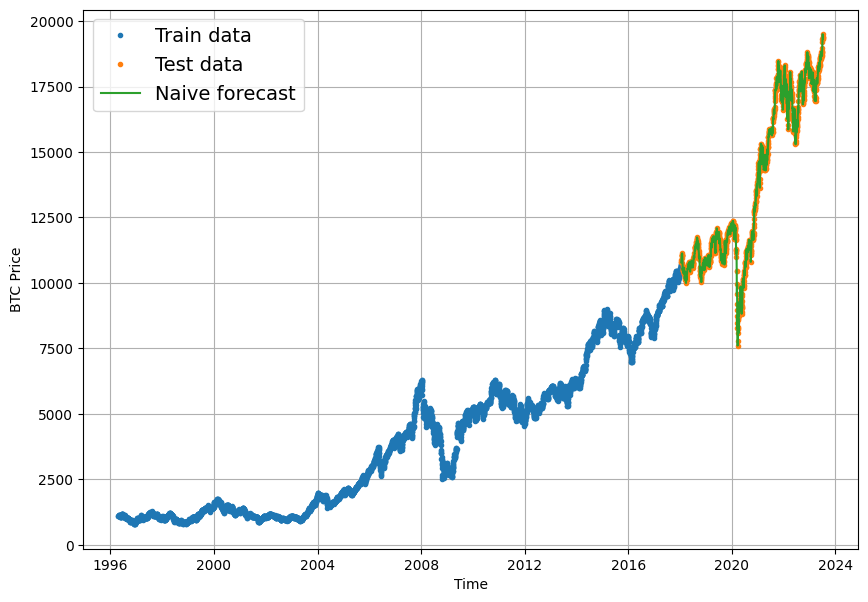

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

## Evaluating a time series model

Time series forecasting often involves predicting a number (in our case, the price of Bitcoin).

And what kind of problem is predicting a number?

Ten points if you said regression.

With this known, we can use regression evaluation metrics to evaluate our time series forecasts.

The main thing we will be evaluating is: **how do our model's predictions (`y_pred`) compare against the actual values (`y_true` or *ground truth values*)**?

> 📖 **Resource:** We're going to be using several metrics to evaluate our different model's time series forecast accuracy. Many of them are sourced and explained mathematically and conceptually in [Forecasting: Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html), I'd recommend reading through here for a more in-depth overview of what we're going to practice.

For all of the following metrics, **lower is better** (for example an MAE of 0 is better than an MAE 100).

### Scale-dependent errors

These are metrics which can be used to compare time series values and forecasts that are on the same scale.

For example, Bitcoin historical prices in USD veresus Bitcoin forecast values in USD.

| Metric | Details | Code |
| ----- | ----- | ----- |
| **MAE** (mean absolute error) | Easy to interpret (a forecast is X amount different from actual amount). Forecast methods which minimises the MAE will lead to forecasts of the median. | [`tf.keras.metrics.mean_absolute_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanAbsoluteError) |
| **RMSE** (root mean square error) | Forecasts which minimise the RMSE lead to forecasts of the mean. | `tf.sqrt(`[`tf.keras.metrics.mean_square_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/RootMeanSquaredError)`)`|

### Percentage errors

Percentage errors do not have units, this means they can be used to compare forecasts across different datasets.

| **Metric** | **Details** | **Code** |
| ----- | ----- | ----- |
| **MAPE** (mean absolute percentage error) | Most commonly used percentage error. May explode (not work) if `y=0`. | [`tf.keras.metrics.mean_absolute_percentage_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MAPE) |
| **sMAPE** (symmetric mean absolute percentage error) | Recommended not to be used by [Forecasting: Principles and Practice](https://otexts.com/fpp3/accuracy.html#percentage-errors), though it is used in forecasting competitions. | Custom implementation |

### Scaled errors

Scaled errors are an alternative to percentage errors when comparing forecast performance across different time series.

| **Metric** | **Details** | **Code** |
| ----- | ----- | ----- |
| **MASE** (mean absolute scaled error). | MASE equals one for the naive forecast (or very close to one). A forecast which performs better than the naïve should get

In [ ]:
import tensorflow as tf
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 104.59947,
 'mse': 21589.684,
 'rmse': 146.93428,
 'mape': 0.7911349,
 'mase': 0.99946237}

In [ ]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

13793.172841328413

## Other kinds of time series forecasting models which can be used for baselines and actual forecasts

Since we've got a naïve forecast baseline to work with, it's time we start building models to try and beat it.

And because this course is focused on TensorFlow and deep learning, we're going to be using TensorFlow to build deep learning models to try and improve on our naïve forecasting results.

That being said, there are many other kinds of models you may want to look into for building baselines/performing forecasts.

Some of them may even beat our best performing models in this notebook, however, I'll leave trying them out for extra-curriculum.

| **Model/Library Name** | **Resource** |
| ----- | ----- |
| Moving average | https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/ |
| ARIMA (Autoregression Integrated Moving Average) | https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/ |
| sktime (Scikit-Learn for time series) | https://github.com/alan-turing-institute/sktime |
| TensorFlow Decision Forests (random forest, gradient boosting trees) | https://www.tensorflow.org/decision_forests |
| Facebook Kats (purpose-built forecasting and time series analysis library by Facebook) | https://github.com/facebookresearch/Kats |
| LinkedIn Greykite (flexible, intuitive and fast forecasts) | https://github.com/linkedin/greykite |

##Windowing our dataset

In [ ]:
len(y_train)

5418

In [ ]:
len(nifty_price)

6773

In [ ]:
#Setting up global variables for windows and horizons
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
def get_labelled_windows(x,horizon = HORIZON):
  """
  create a labelled window dataset.

  Input = data

  output = a set of data with window size as the data and next n+1 observation as the horizon
  """
  return x[:, :-horizon], x[:,-horizon:]

In [ ]:
#TEsting out the function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

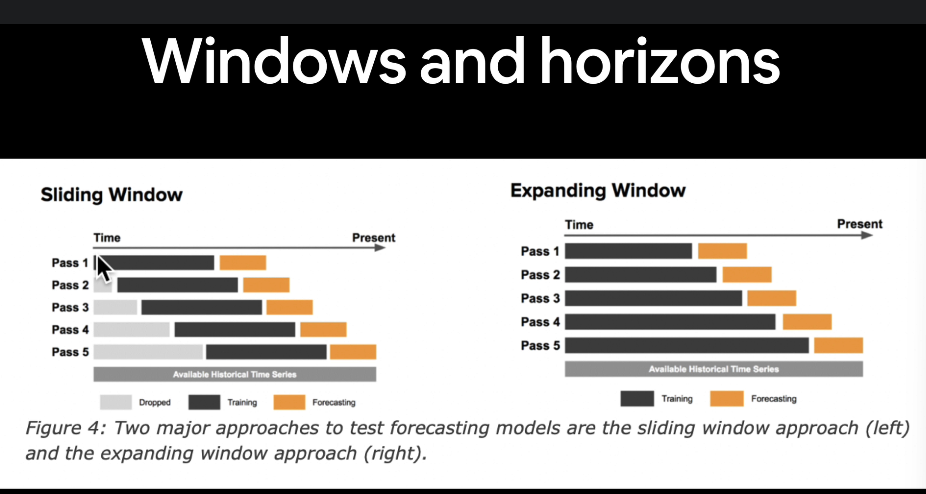

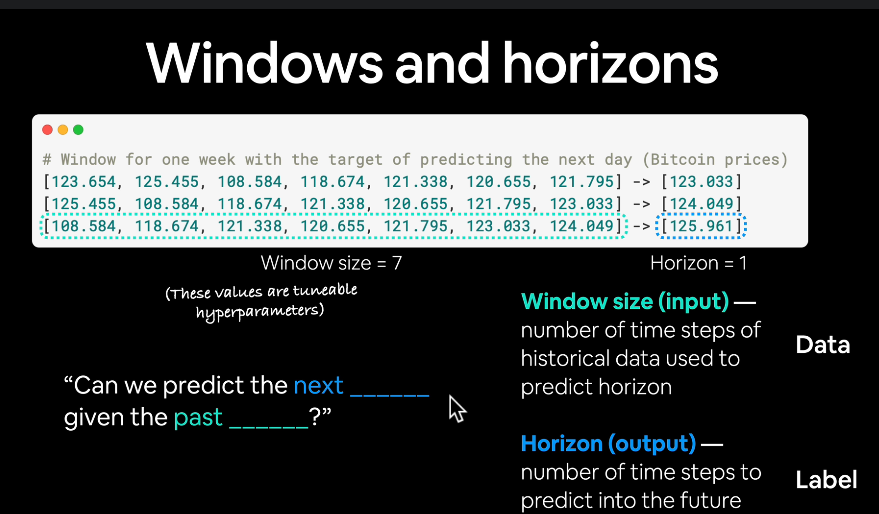

In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [ ]:
len(full_windows), len(full_labels)

(6766, 6766)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [1106.9 1095.8 1145.1 1120.8 1123.6 1118.3 1114.3] -> Label: [1137.8]
Window: [1095.8 1145.1 1120.8 1123.6 1118.3 1114.3 1137.8] -> Label: [1132.]
Window: [1145.1 1120.8 1123.6 1118.3 1114.3 1137.8 1132. ] -> Label: [1119.4]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [18691.2  18817.4  18972.1  19189.05 19322.55 19389.   19398.5 ] -> Label: [19497.3]
Window: [18817.4  18972.1  19189.05 19322.55 19389.   19398.5  19497.3 ] -> Label: [19331.8]
Window: [18972.1  19189.05 19322.55 19389.   19398.5  19497.3  19331.8 ] -> Label: [19355.9]


##Creation of the training and testing sets

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(5412, 1354, 5412, 1354)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[1106.9, 1095.8, 1145.1, 1120.8, 1123.6, 1118.3, 1114.3],
        [1095.8, 1145.1, 1120.8, 1123.6, 1118.3, 1114.3, 1137.8],
        [1145.1, 1120.8, 1123.6, 1118.3, 1114.3, 1137.8, 1132. ],
        [1120.8, 1123.6, 1118.3, 1114.3, 1137.8, 1132. , 1119.4],
        [1123.6, 1118.3, 1114.3, 1137.8, 1132. , 1119.4, 1088.2]]),
 array([[1137.8],
        [1132. ],
        [1119.4],
        [1088.2],
        [1093. ]]))

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [ ]:
len(y_train)

5418

##Creation of a modeliing checkpoint

saves the best performing epoch


In [ ]:
import os

SAVE_DIR="Model_checkpoints"
def create_model_checkpoint(model_name, save_path = SAVE_DIR):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name+".h5"),
                                            verbose=0,
                                            save_best_only=True)

#model 1 : Dense model (window = 7, horizon = 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
#Set random sedd
tf.random.set_seed(42)
#1. model building
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear"),

], name = "model_1_dense")

#2. Model compilation
model_1.compile(loss = "mae",
                optimizer = "Adam",
                metrics = ["mae", "mse"])

#3. model fitting
model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_1.name, SAVE_DIR)])

Epoch 1/100
43/43 [==============================] - 6s 8ms/step - loss: 486.2751 - mae: 486.2751 - mse: 921190.9375 - val_loss: 292.6177 - val_mae: 292.6177 - val_mse: 123426.2812
Epoch 2/100
43/43 [==============================] - 0s 4ms/step - loss: 69.0933 - mae: 69.0933 - mse: 10435.6416 - val_loss: 184.2109 - val_mae: 184.2109 - val_mse: 63877.2109
Epoch 3/100
43/43 [==============================] - 0s 5ms/step - loss: 65.2519 - mae: 65.2519 - mse: 9351.1572 - val_loss: 187.4182 - val_mae: 187.4182 - val_mse: 70263.6953
Epoch 4/100
43/43 [==============================] - 0s 4ms/step - loss: 64.5082 - mae: 64.5082 - mse: 9164.9541 - val_loss: 177.5648 - val_mae: 177.5648 - val_mse: 62066.0547
Epoch 5/100
43/43 [==============================] - 0s 4ms/step - loss: 63.8465 - mae: 63.8465 - mse: 8931.6475 - val_loss: 175.4814 - val_mae: 175.4814 - val_mse: 59364.9531
Epoch 6/100
43/43 [==============================] - 0s 5ms/step - loss: 64.0438 - mae: 64.0438 - mse: 9061.2568 -

In [ ]:
model_1.evaluate(test_windows, test_labels)

43/43 [==============================] - 0s 5ms/step - loss: 119.1746 - mae: 119.1746 - mse: 25368.3398


[119.17459869384766, 119.17459869384766, 25368.33984375]

In [ ]:
loaded = tf.keras.models.load_model("/content/Model_checkpoints/model_1_dense.h5")

In [ ]:
loaded.evaluate(test_windows, test_labels)

43/43 [==============================] - 1s 4ms/step - loss: 109.0754 - mae: 109.0754 - mse: 23136.6543


[109.07539367675781, 109.07539367675781, 23136.654296875]

In [ ]:
naive_results

{'mae': 104.59947,
 'mse': 21589.684,
 'rmse': 146.93428,
 'mape': 0.7911349,
 'mase': 0.99946237}

##Making forecasts
not the actuakl forecasts but pseudo forecasts

In [ ]:
def make_preds(model, input_data):
  """
  Uses data to make prediction input_data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
#Making predictions
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

43/43 [==============================] - 0s 3ms/step


(1354,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([10746.072, 10777.252, 10842.148, 10921.34 , 11031.275, 11052.506,
        11051.529, 11089.378, 11024.86 , 10996.845], dtype=float32)>)

In [ ]:
model_1_results = evaluate_preds(tf.squeeze(test_labels),
                               model_1_preds)
model_1_results

{'mae': 119.1746,
 'mse': 25368.34,
 'rmse': 159.27441,
 'mape': 0.8931991,
 'mase': 1.1387297}

In [ ]:
naive_results

{'mae': 104.59947,
 'mse': 21589.684,
 'rmse': 146.93428,
 'mape': 0.7911349,
 'mase': 0.99946237}

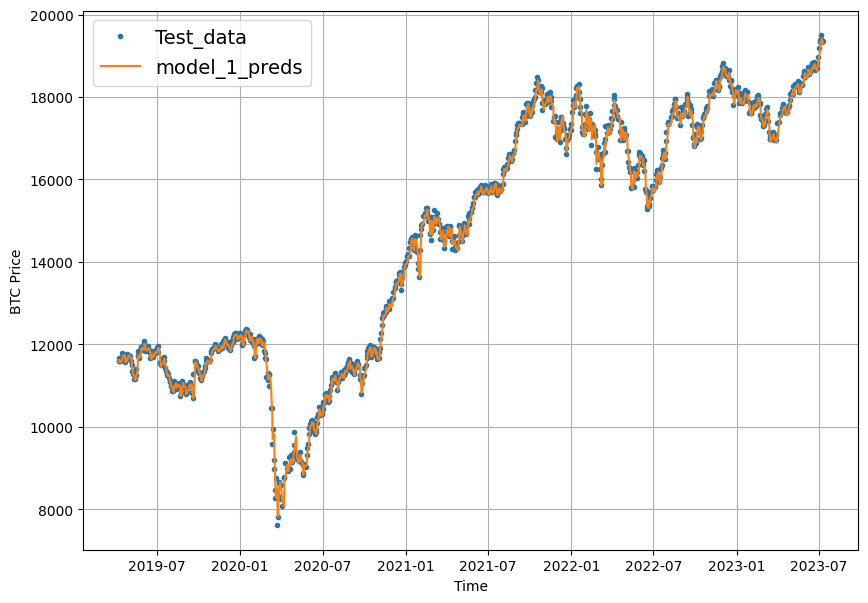

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

##Model:2 window = 30 , horizon = 1

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=30, horizon=1)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(5394, 1349, 5394, 1349)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
#Set random sedd
tf.random.set_seed(42)
#1. model building
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(1, activation = "linear"),

], name = "model_2_dense")

#2. Model compilation
model_2.compile(loss = "mae",
                optimizer = "Adam",
                metrics = ["mae", "mse"])

#3. model fitting
model_2.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_2.name, SAVE_DIR)])

Epoch 1/100
43/43 [==============================] - 2s 12ms/step - loss: 779.5966 - mae: 779.5966 - mse: 2284519.7500 - val_loss: 415.8298 - val_mae: 415.8298 - val_mse: 294423.7812
Epoch 2/100
43/43 [==============================] - 0s 11ms/step - loss: 124.0113 - mae: 124.0113 - mse: 32406.8809 - val_loss: 342.1435 - val_mae: 342.1435 - val_mse: 234954.6250
Epoch 3/100
43/43 [==============================] - 1s 17ms/step - loss: 121.0061 - mae: 121.0061 - mse: 30999.8984 - val_loss: 316.0429 - val_mae: 316.0429 - val_mse: 185818.9531
Epoch 4/100
43/43 [==============================] - 0s 9ms/step - loss: 110.7903 - mae: 110.7903 - mse: 25783.6289 - val_loss: 345.0330 - val_mae: 345.0330 - val_mse: 197686.5938
Epoch 5/100
43/43 [==============================] - 1s 12ms/step - loss: 105.4398 - mae: 105.4398 - mse: 23676.2617 - val_loss: 329.0717 - val_mae: 329.0717 - val_mse: 201710.0156
Epoch 6/100
43/43 [==============================] - 0s 9ms/step - loss: 94.4575 - mae: 94.457

In [ ]:
load_model_2 = tf.keras.models.load_model("/content/Model_checkpoints/model_2_dense.h5")

In [ ]:
load_model_2.evaluate(test_windows, test_labels)


43/43 [==============================] - 0s 2ms/step - loss: 123.4001 - mae: 123.4001 - mse: 28551.2832


[123.4001235961914, 123.4001235961914, 28551.283203125]

In [ ]:
# Load in best performing model
model_2 = tf.keras.models.load_model("/content/Model_checkpoints/model_2_dense.h5")
model_2.evaluate(test_windows, test_labels)

43/43 [==============================] - 0s 2ms/step - loss: 123.4001 - mae: 123.4001 - mse: 28551.2832


[123.4001235961914, 123.4001235961914, 28551.283203125]

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

43/43 [==============================] - 0s 1ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 123.40012,
 'mse': 28551.273,
 'rmse': 168.97122,
 'mape': 0.9313916,
 'mase': 1.1771197}

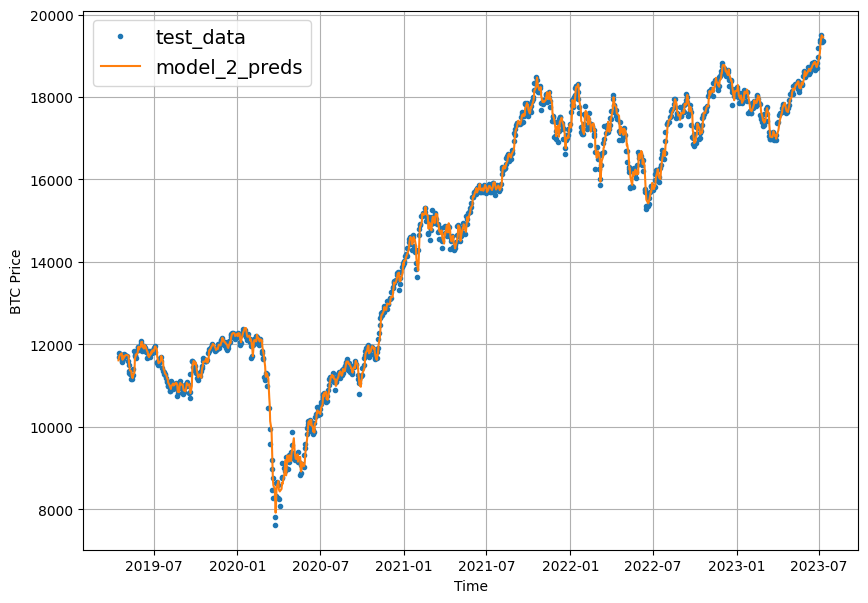

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

In [ ]:
naive_results

{'mae': 104.59947,
 'mse': 21589.684,
 'rmse': 146.93428,
 'mape': 0.7911349,
 'mase': 0.99946237}

##Model 3 windows = 30 , horizon = 7

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(6737, 6737)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(5389, 1348, 5389, 1348)

In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

43/43 [==============================] - 0s 2ms/step - loss: 267.3577


267.3576965332031

In [ ]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("/content/Model_checkpoints/model_3_dense.h5")
model_3.evaluate(test_windows, test_labels)

43/43 [==============================] - 0s 2ms/step - loss: 232.1995


232.1995391845703

In [ ]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

43/43 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[10709.186 , 10732.351 , 10789.023 , 10677.837 , 10715.859 ,
        10768.346 , 10739.194 ],
       [10790.063 , 10792.368 , 10843.479 , 10738.19  , 10785.476 ,
        10867.648 , 10808.006 ],
       [10831.106 , 10874.213 , 10867.804 , 10802.989 , 10855.994 ,
        10903.433 , 10860.066 ],
       [10885.839 , 10910.55  , 10895.0205, 10862.898 , 10917.368 ,
        10924.608 , 10880.035 ],
       [10981.622 , 10961.295 , 10986.184 , 10946.222 , 11014.007 ,
        10986.419 , 10958.385 ]], dtype=float32)>

In [ ]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([273.69363, 236.43875, 202.52805, ..., 501.2023 , 561.9531 ,
        491.61105], dtype=float32),
 'mse': array([ 87846.96 ,  61147.195,  43661.79 , ..., 307407.97 , 342813.56 ,
        252780.72 ], dtype=float32),
 'rmse': array([296.3899 , 247.27959, 208.95403, ..., 554.44385, 585.5028 ,
        502.773  ], dtype=float32),
 'mape': array([2.4771159, 2.1378624, 1.8296976, ..., 2.5925815, 2.904971 ,
        2.538104 ], dtype=float32),
 'mase': 2.2156909}

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 232.19951,
 'mse': 108224.31,
 'rmse': 263.85822,
 'mape': 1.7563777,
 'mase': 2.2156909}

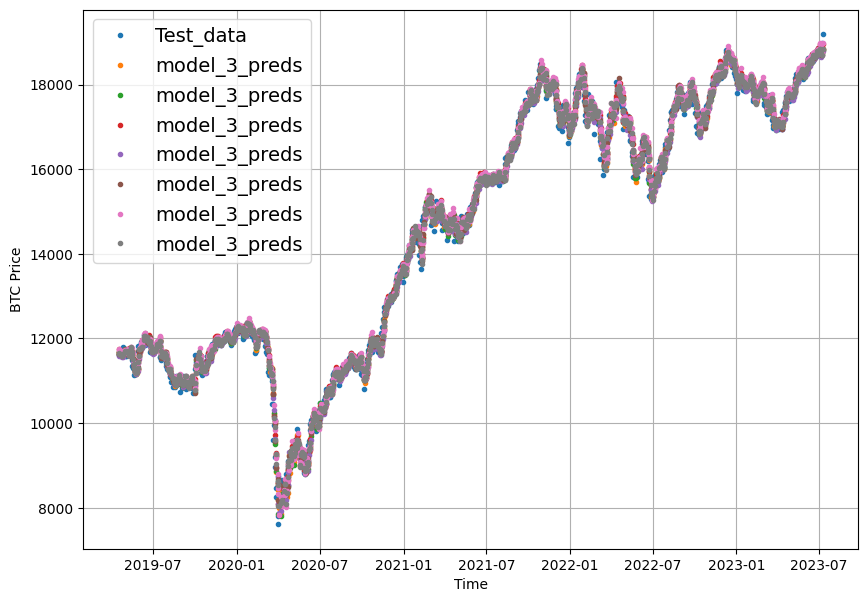

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

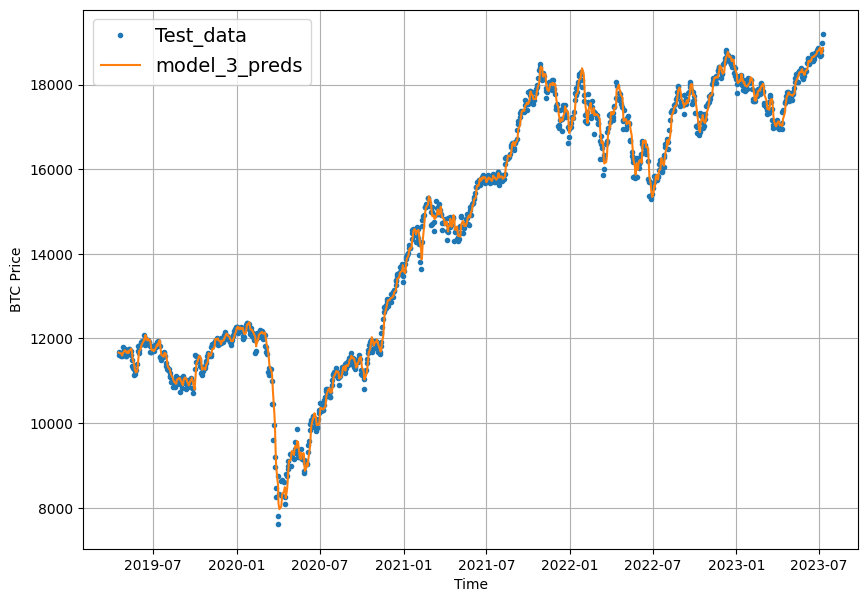

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

#Compairing model performances

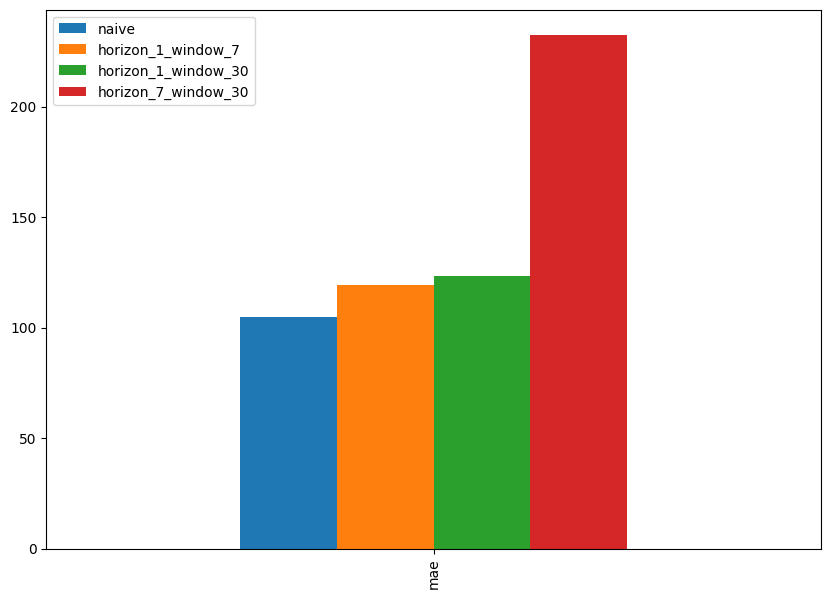

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

The model with horizon 1 and window 7 seems to perform the closest to the naive model hence we will choose this one

##Model 4: Conv1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(6766, 6766)

In [ ]:
#Creating the traioning and testing split
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(5412, 5412, 1354, 1354)

In [ ]:
#As the Conv1D layer expects input shape to be of format[7,1], as we are trying to look at a window of 7 for each horizon
#Thus we will try reshaping the data before passing it itno the conv1D layer
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=array([1106.9, 1095.8, 1145.1, 1120.8, 1123.6, 1118.3, 1114.3])>

In [ ]:
expand_dims_layer = layers.Lambda(
    lambda x: tf.expand_dims(x, axis = 1) # creating a lambda function layer to add that 1 extra dimension to each data point
)

In [ ]:
#Testing the dimension expansion layer
print(f"expanded dim{expand_dims_layer(x).shape}")
print(f"normal data: {x}")
print(f"expanded data: {expand_dims_layer(x)}")

expanded dim(7, 1)
normal data: [1106.9 1095.8 1145.1 1120.8 1123.6 1118.3 1114.3]
expanded data: [[1106.9]
 [1095.8]
 [1145.1]
 [1120.8]
 [1123.6]
 [1118.3]
 [1114.3]]


In [ ]:
#Setting the seed
tf.random.set_seed(42)
#Creating the model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    layers.Conv1D(filters = 128,
                  kernel_size = 7, #window size of the filter in timeseries forecasting
                  padding="causal",
                  activation="relu"),
    layers.Dense(HORIZON)

], name = "model_4_Conv1D")

#compiling the model
model_4.compile(loss = "mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

#4. Fitting the model
history_4 = model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
43/43 [==============================] - 6s 12ms/step - loss: 2086.7302 - mae: 2086.7302 - mse: 10247957.0000 - val_loss: 1241.2043 - val_mae: 1241.2043 - val_mse: 1677724.7500
Epoch 2/100
43/43 [==============================] - 0s 6ms/step - loss: 106.5434 - mae: 106.5434 - mse: 27754.9805 - val_loss: 179.6440 - val_mae: 179.6440 - val_mse: 59385.9961
Epoch 3/100
43/43 [==============================] - 0s 5ms/step - loss: 64.1326 - mae: 64.1326 - mse: 9057.7217 - val_loss: 181.4584 - val_mae: 181.4584 - val_mse: 65334.9648
Epoch 4/100
43/43 [==============================] - 0s 5ms/step - loss: 62.7771 - mae: 62.7771 - mse: 8830.8926 - val_loss: 174.3364 - val_mae: 174.3364 - val_mse: 59318.7188
Epoch 5/100
43/43 [==============================] - 0s 5ms/step - loss: 63.0340 - mae: 63.0340 - mse: 8725.9512 - val_loss: 178.1072 - val_mae: 178.1072 - val_mse: 62943.1602
Epoch 6/100
43/43 [==============================] - 0s 5ms/step - loss: 62.6220 - mae: 62.6220 - mse: 8

In [ ]:
# Evaluating the model
model_4.evaluate(test_windows, test_labels)

43/43 [==============================] - 0s 3ms/step - loss: 124.5837 - mae: 124.5837 - mse: 27473.6582


[124.58367919921875, 124.58367919921875, 27473.658203125]

In [ ]:
# Load in best version of model_3 and evaluate
model_4 = tf.keras.models.load_model("/content/Model_checkpoints/model_4_Conv1D.h5")
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_4_preds = make_preds(model_4,
                           input_data=test_windows)
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

43/43 [==============================] - 0s 2ms/step


{'mae': 115.46531,
 'mse': 25364.271,
 'rmse': 159.26164,
 'mape': 0.872765,
 'mase': 1.103287}

In [ ]:
naive_results

{'mae': 104.59947,
 'mse': 21589.684,
 'rmse': 146.93428,
 'mape': 0.7911349,
 'mase': 0.99946237}

##Model 5: LSTM

In [ ]:
#Setting the seed
tf.random.set_seed(42)
#Creating the model
model_5 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    layers.Bidirectional(layers.LSTM(64, activation="relu")),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)

], name = "model_5_LSTM")

#compiling the model
model_5.compile(loss = "mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

#4. Fitting the model
history_5 = model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
43/43 [==============================] - 6s 18ms/step - loss: 1869.5669 - mae: 1869.5669 - mse: 8032363.5000 - val_loss: 728.5967 - val_mae: 728.5967 - val_mse: 607281.1875
Epoch 2/100
43/43 [==============================] - 0s 10ms/step - loss: 119.4862 - mae: 119.4862 - mse: 33834.3945 - val_loss: 212.7837 - val_mae: 212.7837 - val_mse: 75680.0625
Epoch 3/100
43/43 [==============================] - 0s 10ms/step - loss: 67.3258 - mae: 67.3258 - mse: 9926.5146 - val_loss: 187.8614 - val_mae: 187.8614 - val_mse: 70395.5469
Epoch 4/100
43/43 [==============================] - 0s 10ms/step - loss: 65.7075 - mae: 65.7075 - mse: 9544.7139 - val_loss: 182.5545 - val_mae: 182.5545 - val_mse: 65334.3203
Epoch 5/100
43/43 [==============================] - 0s 10ms/step - loss: 66.5620 - mae: 66.5620 - mse: 9657.9131 - val_loss: 182.8573 - val_mae: 182.8573 - val_mse: 63087.9805
Epoch 6/100
43/43 [==============================] - 1s 17ms/step - loss: 64.7050 - mae: 64.7050 - mse: 

In [ ]:
model_5 = tf.keras.models.load_model("/content/Model_checkpoints/model_5_LSTM.h5")

model_5_preds = make_preds(model_5,
                           input_data=test_windows)
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

43/43 [==============================] - 0s 2ms/step


{'mae': 116.59994,
 'mse': 25518.08,
 'rmse': 159.74379,
 'mape': 0.88056177,
 'mase': 1.1141285}

In [ ]:
naive_results

{'mae': 104.59947,
 'mse': 21589.684,
 'rmse': 146.93428,
 'mape': 0.7911349,
 'mase': 0.99946237}

#Multivariate timeseries Dataset creation

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NIFTY_data/NIFTY 50_Data (1).csv",
                 parse_dates=["Date"],
                 index_col=["Date"])

In [ ]:
df

,Open,High,Low,Close
Date,,,,
2023-07-10,19400.35,19435.85,19327.10,19355.9
2023-07-07,19422.80,19523.60,19303.60,19331.8
2023-07-06,19385.70,19512.20,19373.00,19497.3
2023-07-05,19405.95,19421.60,19339.60,19398.5
2023-07-04,19406.60,19434.15,19300.00,19389.0
...,...,...,...,...
1996-04-26,1133.17,1133.17,1106.29,1123.6
1996-04-25,1157.94,1160.16,1110.61,1120.8
1996-04-24,1136.97,1145.11,1126.77,1145.1


In [ ]:
convert_dict = {"Open" : np.float32,
                "High" : np.float32,
                "Low" : np.float32,
                "Close" : np.float32,
                }

df = df.astype(convert_dict)
print(df.dtypes)

Open     float32
High     float32
Low      float32
Close    float32
dtype: object


<Axes: xlabel='Date'>

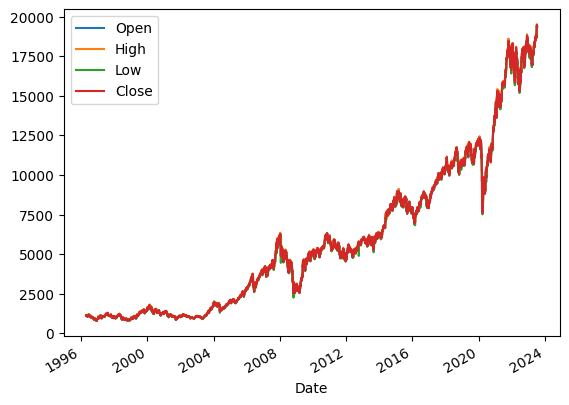

In [ ]:
df.plot()

###Windowing the dataset

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
nifty_windowed = df.copy()
#Adding the windowed columns using shift method
for i in range(WINDOW_SIZE):
  nifty_windowed[f"Close+{i+1}"] = nifty_windowed["Close"].shift(periods=i+1)
nifty_windowed

,Open,High,Low,Close,Close+1,Close+2,Close+3,Close+4,Close+5,Close+6,Close+7
Date,,,,,,,,,,,
2023-07-10,19400.349609,19435.849609,19327.099609,19355.900391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-07,19422.800781,19523.599609,19303.599609,19331.800781,19355.900391,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-06,19385.699219,19512.199219,19373.000000,19497.300781,19331.800781,19355.900391,NaN,NaN,NaN,NaN,NaN
2023-07-05,19405.949219,19421.599609,19339.599609,19398.500000,19497.300781,19331.800781,19355.900391,NaN,NaN,NaN,NaN
2023-07-04,19406.599609,19434.150391,19300.000000,19389.000000,19398.500000,19497.300781,19331.800781,19355.900391,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1996-04-26,1133.170044,1133.170044,1106.290039,1123.599976,1118.300049,1114.300049,1137.800049,1132.000000,1119.400024,1088.199951,1093.000000
1996-04-25,1157.939941,1160.160034,1110.609985,1120.800049,1123.599976,1118.300049,1114.300049,1137.800049,1132.000000,1119.400024,1088.199951
1996-04-24,1136.969971,1145.109985,1126.770020,1145.099976,1120.800049,1123.599976,1118.300049,1114.300049,1137.800049,1132.000000,1119.400024


In [ ]:
X = nifty_windowed.dropna().drop("Close", axis = 1)
y = nifty_windowed.dropna()["Close"]

In [ ]:
X.head()

,Open,High,Low,Close+1,Close+2,Close+3,Close+4,Close+5,Close+6,Close+7
Date,,,,,,,,,,
2023-06-28,18908.150391,19011.250000,18861.349609,19189.050781,19322.550781,19389.000000,19398.500000,19497.300781,19331.800781,19355.900391
2023-06-27,18748.550781,18829.250000,18714.250000,18972.099609,19189.050781,19322.550781,19389.000000,19398.500000,19497.300781,19331.800781
2023-06-26,18682.349609,18722.050781,18646.699219,18817.400391,18972.099609,19189.050781,19322.550781,19389.000000,19398.500000,19497.300781
2023-06-23,18741.849609,18756.400391,18647.099609,18691.199219,18817.400391,18972.099609,19189.050781,19322.550781,19389.000000,19398.500000
2023-06-22,18853.599609,18886.599609,18759.500000,18665.500000,18691.199219,18817.400391,18972.099609,19189.050781,19322.550781,19389.000000


In [ ]:
y.head()

Date
2023-06-28    18972.099609
2023-06-27    18817.400391
2023-06-26    18691.199219
2023-06-23    18665.500000
2023-06-22    18771.250000
Name: Close, dtype: float32

In [ ]:
#Creating the training and testing datasets using indexing
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(5412, 5412, 1353, 1353)

#Model 6: Using multivariate data

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
#Set random sedd
tf.random.set_seed(42)
#1. model building
model_6 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    layers.Bidirectional(layers.LSTM(64, activation="relu")),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation = "linear"),

], name = "model_6_multivariate")

#2. Model compilation
model_6.compile(loss = "mae",
                optimizer = "Adam",
                metrics = ["mae", "mse"])

#3. model fitting
history_6 = model_6.fit(x = X_train,
            y = y_train,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (X_test, y_test),
            callbacks = [create_model_checkpoint(model_6.name, SAVE_DIR)])

Epoch 1/100
43/43 [==============================] - 5s 18ms/step - loss: 2715.1677 - mae: 2715.1677 - mse: 19625618.0000 - val_loss: 25.6848 - val_mae: 25.6848 - val_mse: 1034.0878
Epoch 2/100
43/43 [==============================] - 0s 10ms/step - loss: 124.0544 - mae: 124.0544 - mse: 33374.4766 - val_loss: 18.9885 - val_mae: 18.9885 - val_mse: 604.7642
Epoch 3/100
43/43 [==============================] - 0s 11ms/step - loss: 69.2422 - mae: 69.2422 - mse: 11058.5107 - val_loss: 17.7976 - val_mae: 17.7976 - val_mse: 539.3510
Epoch 4/100
43/43 [==============================] - 0s 10ms/step - loss: 68.3730 - mae: 68.3730 - mse: 10691.1992 - val_loss: 17.6422 - val_mae: 17.6422 - val_mse: 528.9244
Epoch 5/100
43/43 [==============================] - 0s 10ms/step - loss: 67.0491 - mae: 67.0491 - mse: 10347.2178 - val_loss: 17.2198 - val_mae: 17.2198 - val_mse: 506.6631
Epoch 6/100
43/43 [==============================] - 0s 10ms/step - loss: 65.1107 - mae: 65.1107 - mse: 9817.0498 - val_

In [ ]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("/content/Model_checkpoints/model_6_multivariate.h5")
model_6.evaluate(X_test, y_test)

43/43 [==============================] - 0s 3ms/step - loss: 7.4786 - mae: 7.4786 - mse: 113.2658


[7.478579998016357, 7.478579998016357, 113.26580047607422]

In [ ]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

43/43 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 899.9484 ,  886.02246,  890.4437 ,  928.48376,  967.7955 ,
        991.18036, 1018.6985 , 1026.7585 , 1026.9891 , 1043.5679 ],
      dtype=float32)>

In [ ]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 7.4785776,
 'mse': 113.2658,
 'rmse': 10.64264,
 'mape': 0.6423031,
 'mase': 0.49490932}

In [ ]:
naive_results

{'mae': 104.59947,
 'mse': 21589.684,
 'rmse': 146.93428,
 'mape': 0.7911349,
 'mase': 0.99946237}

In [ ]:
# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()


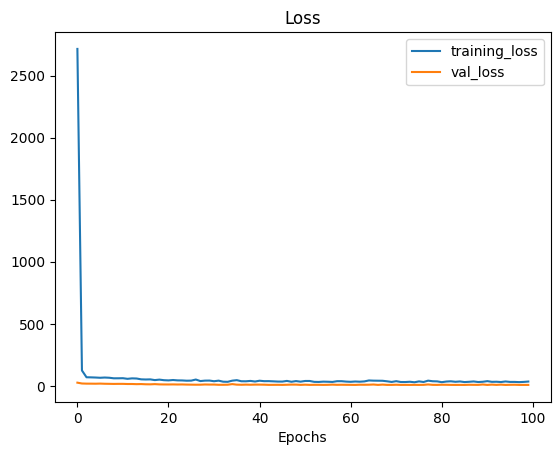

In [ ]:
#PLotting the loss curves to check for overfitting
plot_loss_curves(history_6)

In [ ]:
model_7.fit(x = X_train,
            y = y_train,
            epochs=N_EPOCHS,
            validation_data=(X_test, y_test),
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

##Model 7 : N-Beats Algorithm


Replicating the below layer as a custom layer

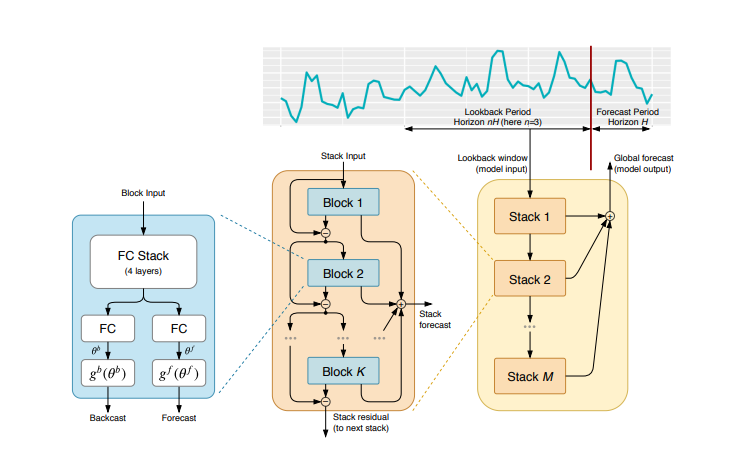

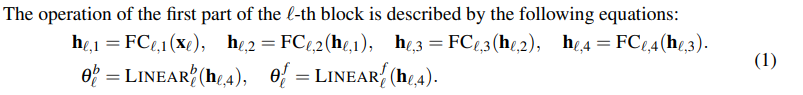

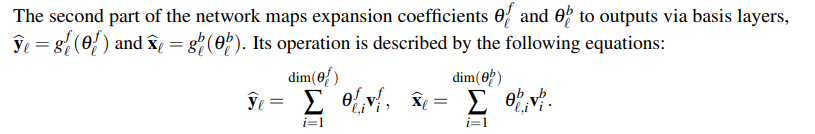

In [ ]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast


In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.9263554  -0.4333775   0.7475171  -0.15714343  0.28485197  0.02083088
  0.7660509 ]
Forecast: 0.5152412056922913


 ### Preparing data for the N-BEATS algorithm


In [ ]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [ ]:
convert_dict = {"Price" : np.float32
                }

nifty_prices = nifty_prices.astype(convert_dict)
print(nifty_prices.dtypes)

Price    float32
dtype: object


In [ ]:
# Create NBEATS data inputs (NBEATS works with univariate time series
nifty_prices.head()

,Price
Date,
1996-04-22,1106.900024
1996-04-23,1095.800049
1996-04-24,1145.099976
1996-04-25,1120.800049
1996-04-26,1123.599976


In [ ]:
# Add windowed columns
nifty_prices_nbeats = nifty_prices.copy()
for i in range(WINDOW_SIZE):
  nifty_prices_nbeats[f"Price+{i+1}"] = nifty_prices_nbeats["Price"].shift(periods=i+1)
nifty_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
1996-05-01,1137.800049,1114.300049,1118.300049,1123.599976,1120.800049,1145.099976,1095.800049,1106.900024
1996-05-02,1132.000000,1137.800049,1114.300049,1118.300049,1123.599976,1120.800049,1145.099976,1095.800049
1996-05-03,1119.400024,1132.000000,1137.800049,1114.300049,1118.300049,1123.599976,1120.800049,1145.099976
1996-05-06,1088.199951,1119.400024,1132.000000,1137.800049,1114.300049,1118.300049,1123.599976,1120.800049
1996-05-07,1093.000000,1088.199951,1119.400024,1132.000000,1137.800049,1114.300049,1118.300049,1123.599976


In [ ]:
# Make features and labels
X = nifty_prices_nbeats.dropna().drop("Price", axis=1)
y = nifty_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(5412, 5412, 1354, 1354)

In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

###Setting up hyperparameters for N-BEATS algorithm

In [ ]:
##Values from N-BEATS paper Figure 1 and Table 18/Appendix D of N-Beats Paper
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 318: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 725: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 825: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 5min 49s, sys: 5.71 s, total: 5min 54s
Wall time: 7min 3s


In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

2/2 [==============================] - 0s 14ms/step - loss: 105.6947 - mae: 105.6947 - mse: 22427.6211


[105.6947021484375, 105.6947021484375, 22427.62109375]

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

2/2 [==============================] - 1s 15ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10782.4375, 10821.975 , 10884.8545, 10955.993 , 11065.753 ,
       11086.19  , 11077.721 , 11124.557 , 11063.442 , 11029.291 ],
      dtype=float32)>

In [ ]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 105.6947,
 'mse': 22427.621,
 'rmse': 149.75854,
 'mape': 0.80002874,
 'mase': 1.0099274}

In [ ]:
naive_results

{'mae': 104.59947,
 'mse': 21589.684,
 'rmse': 146.93428,
 'mape': 0.7911349,
 'mase': 0.99946237}